In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from dgpylib import dg_athena
from dgpylib import dg_s3 
import os
import re
from dateutil.relativedelta import relativedelta

import sys
sys.path.insert(0, '../EDA')
import basicstatsandplotter as bstatsplot

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator

plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 100

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# query_result = conn.read(query)
# query_result

In [4]:
conn1 = dg_s3.Connect('dgdatadump/DS&CA/Pricing/02 Projects/2022/Tel_Reg_2.0/Cancellation Model')

In [5]:
raw_df = conn1.read('TelReg_Canx_dedup.csv') #TelReg_Canx_dedup

raw_df.head()

,offerreferencenumber,offereffectivedatetime,offereffectiveweek,offeracceptedprice,offerbusinesseventcode,offerpostcode,offeracceptedindicator,sale,offertotalprice,persongoldencopyid,itemgoldencopyid,itemeventuserid,contractcreateddate,contractstatuscode,contractcompanycode,contractschemecode,contractnumber,contractstatusname,contractenddate,contractmovementdate,contractoriginalstartdate,contractdimensionid,contracteventdatetime,itemcategoryname,itemsupercategorycode,itemgoodscategoryname,manufacturerbrandname,manufacturergroupname,itemmodelnumber,itempurchaseprice,itempurchasedatetime,itemlocationpostcode,personaddresspostcode,planno,gross,planaccdate,rec_status,planstatus,cocode,schcode,movementdate,PmhId,TotalPrice,PeriodOfCover,PricingVersionDescription,PredictedConversionRate,ModelId,PerhId,requested_purchasedate,requested_purchaprice,fee,retentionflag,planlivecount,plansactivepastoneyearcount,plansactivepastfiveyearcount,plansacceptedpastoneyearcount,plansacceptedpastfiveyearcount,planscancelledpastoneyearcount,planscancelledpastfiveyearcount,claimpastoneyearcount,claimpastthreeyearcount,claimpastfiveyearcount,claimamountoneyeartotal,claimamountthreeyeartotal,claimamountfiveyeartotal,prevrtppricetype,buseventcode,itemgoodscatcode,clientgroupdesc,schemetypename,clientaccountdesc,routetomarketname,requested_appliancecode,requested_clientcode,requested_clientgroupcode,requested_itemmanufbrandcode,requested_manugteeperiodlabourmonths,requested_manugteeperiodpartsmonths,offer_request_time,persongoldencopyid_dup,itemcategoryname_dup,manufacturerbrandname_dup,itemlocationpostcode_dup,itemmodelnumber_dup,itemmodelnumber_imputed,itemdiamondcopyid_imputed,itemdiamondcopyid,price_diff,offersourcereceiveddatetime,price_band,datemonth,year,offermonthyear,startmonthyear,contractmonthyear,offereventmonth,startmonth,contractmonth,contract_age,cancelflag
0,351-013-669-232,2022-02-18 00:00:00.000,8,38.28,REG,YO15 1NB,Y,1,38.28,284654657.0,284673972.0,NaN,2022-02-18 00:00:00.000,N,D,AFT,41828,NEW,NaN,2022-02-18 00:00:00.000,2022-02-18 00:00:00.000,49845495,2022-02-18 21:04:11.000,oven,CO,WHITE,BOSCH,BOSCH,NaN,300.00,2022-02-18 00:00:00.000,YO15 1NB,YO15 1NB,41828,38.28,2022-02-18 00:00:00.000,1,N,D,AFT,2022-02-18 00:00:00.000,33443568,38.28,12,ASIS FEE,1.00,NO MODEL,15568125.0,2022-02-18 00:00:00.000,300.00,38.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,REG,W,BOSCH GROUP,TELEPHONE REGISTRATION,BOSCH,REG,OV,351.0,296.0,BOSC,24.0,24.0,2022-02-18 22:40:14.000,NaN,NaN,NaN,NaN,NaN,XXX,284654657ovenBOSCHXXXYO151NB,284654657ovenBOSCHXXXYO151NB,0.000000,2022-02-18 16:37:08.521,"[0.99, 1.0]",218,2022,2022-02,2022-02,2022-02,February,February,February,5.355346,0
1,350-003-076-695,2022-05-20 00:00:00.000,21,66.24,REG,UB3 1FN,Y,1,66.24,295554699.0,295559771.0,NaN,2022-05-20 00:00:00.000,C,D,AT1,73348,CANCELLED,2022-05-30 00:00:00.000,2022-05-30 00:00:00.000,2022-05-20 00:00:00.000,51063794,2022-05-30 18:33:31.000,washer dryer,HL,WHITE,ZANUSSI,ELECTROLUX GROUP,Z716WT83BI,699.99,2022-04-29 00:00:00.000,UB3 1FN,UB3 1FN,73348,66.24,2022-05-20 00:00:00.000,1,C,D,AT1,2022-05-30 00:00:00.000,38712067,66.24,12,TEL REG OPT TARGET 27%,0.24,614C95E4EF9C67AD01949B23/614CA1505613CB56B17145AD,20633515.0,2022-04-29 00:00:00.000,699.99,67.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,REG,W,ELECTROLUX GROUP,TELEPHONE REGISTRATION,ZANUSSI,REG,WD,350.0,168.0,ZANU,24.0,24.0,2022-05-20 22:24:38.000,295554699.0,washer dryer,ZANUSSI,UB3 1FN,Z716WT83BI,Z716WT83BI,295554699washerdryerZANUSSIZ716WT83BIUB31FN,295554699washerdryerZANUSSIZ716WT83BIUB31FN,-0.021277,2022-05-20 17:53:39.971,"[0.9, 0.99]",530,2022,2022-05,2022-05,2022-05,May,May,May,0.328549,1
2,094-001-476-932,2022-05-02 00:00:00.000,19,32.52,REG,NR6 5FS,Y,1,32.52,293954687.0,293958323.0,NaN,2022-05-02 00:00:00.000,N,D,AUG,38227,NEW,NaN,2022-05-02 00:00:00.000,2022-05-02 00:00:00.000,50816979,2022-05-02 21:02:18.000,hob,CO,WHITE,ELECTROLUX,ELECTROLUX GROUP,NaN,300.00,2022-04-01 00

In [6]:
raw_df.shape

(667527, 100)

In [7]:
raw_df.columns.to_list()

['offerreferencenumber',
 'offereffectivedatetime',
 'offereffectiveweek',
 'offeracceptedprice',
 'offerbusinesseventcode',
 'offerpostcode',
 'offeracceptedindicator',
 'sale',
 'offertotalprice',
 'persongoldencopyid',
 'itemgoldencopyid',
 'itemeventuserid',
 'contractcreateddate',
 'contractstatuscode',
 'contractcompanycode',
 'contractschemecode',
 'contractnumber',
 'contractstatusname',
 'contractenddate',
 'contractmovementdate',
 'contractoriginalstartdate',
 'contractdimensionid',
 'contracteventdatetime',
 'itemcategoryname',
 'itemsupercategorycode',
 'itemgoodscategoryname',
 'manufacturerbrandname',
 'manufacturergroupname',
 'itemmodelnumber',
 'itempurchaseprice',
 'itempurchasedatetime',
 'itemlocationpostcode',
 'personaddresspostcode',
 'planno',
 'gross',
 'planaccdate',
 'rec_status',
 'planstatus',
 'cocode',
 'schcode',
 'movementdate',
 'PmhId',
 'TotalPrice',
 'PeriodOfCover',
 'PricingVersionDescription',
 'PredictedConversionRate',
 'ModelId',
 'PerhId',
 '

In [8]:
# ????Filter out offers cancelled within 30 days?????

# filt_df = raw_df.loc[(raw_df['daystocancel']>30)|(raw_df['daystocancel'].isna())]

In [9]:
print(raw_df['movementdate'].min(), raw_df['movementdate'].max())
print(raw_df['planaccdate'].min(), raw_df['planaccdate'].max())

2021-01-02 00:00:00.000 2022-07-31 00:00:00.000
2021-01-01 00:00:00.000 2022-07-31 00:00:00.000


## Date Formatting

In [10]:
date_cols = raw_df.columns[raw_df.columns.str.lower().str.contains('date')]
date_cols

# date formatting 

def date_fix(df, cols):
    df[cols] = df[cols].apply(pd.to_datetime)

date_fix(raw_df, date_cols)

## Cancellation Triangle

In [11]:
raw_df['canceldate']=raw_df[raw_df['contractstatuscode']=='C']['movementdate']

In [12]:
# https://towardsdatascience.com/strategy-analytics-in-python-1-churn-analysis-82cb0247fe6f
def get_date_int(df, column):
   year = df[column].dt.year
   month = df[column].dt.month
   return year, month
  
# Get the integers for the date parts from the 'canceldate' column

cancel_year, cancel_month = get_date_int(raw_df, 'canceldate')

# Get the integers for date parts from the 'planaccdate' column

cohort_year, cohort_month = get_date_int(raw_df, 'planaccdate')

# Calculate difference in years

cancel_years_diff = cancel_year - cohort_year

# Calculate difference in months

cancel_months_diff = cancel_month - cohort_month

# Extract the difference in months from all previous values

raw_df['cancelage'] = cancel_years_diff * 12 + cancel_months_diff
raw_df['cancelage'].head()


0    NaN
1    0.0
2    NaN
3    NaN
4    NaN
Name: cancelage, dtype: float64

In [13]:
raw_df['cancelage'] = raw_df[raw_df['contractstatuscode']=='C']['contract_age']
raw_df['cancelage'] = np.floor(raw_df['cancelage'])

In [14]:
grouping = raw_df.groupby(['startmonthyear', 'cancelage'])

# Count the number of cancelled plans

cohort_data = grouping.agg({'cancelflag': lambda x: x.sum()}).reset_index()

# cohort_data['cum_cancel'] = cohort_data['cancelflag'].cumsum(axis=1)

# Create a pivot

cohort_counts = cohort_data.pivot(index='startmonthyear', columns='cancelage', values='cancelflag')

# cumsum
cohort_cum_counts = cohort_counts.cumsum(axis=1)
cohort_cum_counts

cancelage,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
startmonthyear,,,,,,,,,,,,,,,,,,,
2021-01,2551.0,3737.0,4469.0,5059.0,5610.0,6135.0,6642.0,7167.0,7616.0,8027.0,8501.0,8901.0,9344.0,9987.0,10362.0,10782.0,11145.0,11555.0,11671.0
2021-02,2489.0,3476.0,4189.0,4731.0,5180.0,5673.0,6184.0,6667.0,7096.0,7520.0,7871.0,8281.0,8901.0,9384.0,9755.0,10136.0,10434.0,10562.0,NaN
2021-03,2504.0,3859.0,4709.0,5319.0,5877.0,6303.0,6995.0,7419.0,7889.0,8301.0,8705.0,9363.0,9792.0,10337.0,10680.0,11072.0,11211.0,NaN,NaN
2021-04,2254.0,3335.0,4105.0,4596.0,5186.0,5654.0,6128.0,6513.0,6770.0,7219.0,7769.0,8131.0,8505.0,8884.0,9176.0,9300.0,NaN,NaN,NaN
2021-05,2103.0,3064.0,3849.0,4345.0,5066.0,5464.0,6069.0,6369.0,6789.0,7394.0,7778.0,8226.0,8673.0,9076.0,9199.0,NaN,NaN,NaN,NaN
2021-06,2570.0,3601.0,4385.0,5022.0,5611.0,6104.0,6536.0,6931.0,7569.0,8034.0,8497.0,8886.0,9264.0,9417.0,NaN,NaN,NaN,NaN,NaN
2021-07,2527.0,3300.0,4383.0,4872.0,5591.0,5981.0,6429.0,7034.0,7457.0,7897.0,8280.0,8725.0,8899.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-08,1971.0,2860.0,3627.0,4129.0,4578.0,4943.0,5599.0,5970.0,6329.0,6691.0,6997.0,7079.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09,2184.0,3059.0,3818.0,4364.0,4972.0,5506.0,5991.0,6333.0,6678.0,7011.0,7148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
grouping_offer = raw_df.groupby('startmonthyear')
offer_data = grouping_offer.agg({'offerreferencenumber': lambda x: x.count()}).reset_index()
offer_data

,startmonthyear,offerreferencenumber
0,2021-01,42824
1,2021-02,39457
2,2021-03,43504
3,2021-04,36990
4,2021-05,37238
5,2021-06,38522
6,2021-07,37572
7,2021-08,31921
8,2021-09,33527
9,2021-10,32388


In [16]:
offer_data.set_index('startmonthyear', inplace=True)
offer_data

,offerreferencenumber
startmonthyear,
2021-01,42824
2021-02,39457
2021-03,43504
2021-04,36990
2021-05,37238
2021-06,38522
2021-07,37572
2021-08,31921
2021-09,33527


In [17]:
offer_data['offerreferencenumber']

startmonthyear
2021-01    42824
2021-02    39457
2021-03    43504
2021-04    36990
2021-05    37238
2021-06    38522
2021-07    37572
2021-08    31921
2021-09    33527
2021-10    32388
2021-11    33189
2021-12    29657
2022-01    33861
2022-02    35596
2022-03    32243
2022-04    33838
2022-05    32415
2022-06    32248
2022-07    30537
Name: offerreferencenumber, dtype: int64

In [18]:
# Select the first column and store it to cohort_sizes

cohort_sizes = offer_data['offerreferencenumber']

# Divide the cohort count by cohort sizes along the rows

cancellation_rate = (cohort_cum_counts.divide(cohort_sizes, axis=0))*100

In [19]:
cancellation_rate 

cancelage,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0
startmonthyear,,,,,,,,,,,,,,,,,,,
2021-01,5.956940,8.726415,10.435737,11.813469,13.100131,14.326079,15.509994,16.735942,17.784420,18.744162,19.851018,20.785074,21.819540,23.321035,24.196712,25.177471,26.025126,26.982533,27.253409
2021-02,6.308133,8.809590,10.616621,11.990268,13.128216,14.377677,15.672758,16.896875,17.984135,19.058722,19.948298,20.987404,22.558735,23.782852,24.723116,25.688724,26.443977,26.768381,NaN
2021-03,5.755793,8.870449,10.824292,12.226462,13.509103,14.488323,16.078981,17.053604,18.133965,19.081004,20.009654,21.522159,22.508275,23.761033,24.549467,25.450533,25.770044,NaN,NaN
2021-04,6.093539,9.015950,11.097594,12.424980,14.020005,15.285212,16.566640,17.607461,18.302244,19.516085,21.002974,21.981617,22.992701,24.017302,24.806705,25.141930,NaN,NaN,NaN
2021-05,5.647457,8.228154,10.336216,11.668188,13.604383,14.673183,16.297868,17.103496,18.231377,19.856061,20.887266,22.090338,23.290725,24.372952,24.703260,NaN,NaN,NaN,NaN
2021-06,6.671512,9.347905,11.383106,13.036706,14.565703,15.845491,16.966928,17.992316,19.648513,20.855615,22.057526,23.067338,24.048596,24.445771,NaN,NaN,NaN,NaN,NaN
2021-07,6.725753,8.783136,11.665602,12.967103,14.880762,15.918769,17.111147,18.721388,19.847227,21.018312,22.037688,23.222080,23.685191,NaN,NaN,NaN,NaN,NaN,NaN
2021-08,6.174619,8.959619,11.362426,12.935058,14.341656,15.485104,17.540177,18.702422,19.827073,20.961123,21.919739,22.176624,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09,6.514153,9.123990,11.387837,13.016375,14.829839,16.422585,17.869180,18.889253,19.918275,20.911504,21.320130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


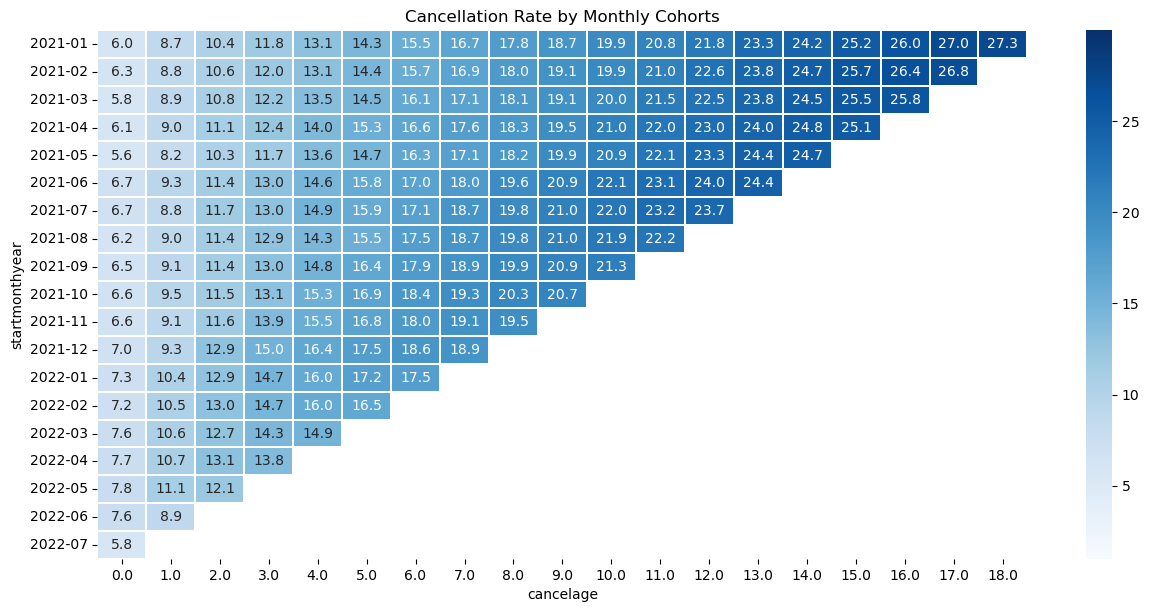

In [20]:
# Create list of month names for visualisation

month_list = cancellation_rate.reset_index()['startmonthyear']

# def get_month_name(x):
#    return datetime.strftime(x, '%b-%y')
  
# month_list = month_list.apply(get_month_name)

# Initialize inches plot figure

plt.figure(figsize=(15,7))

# Add a title

plt.title('Cancellation Rate by Monthly Cohorts')

# Create the heatmap

sns.heatmap(data=cancellation_rate,
annot = True,
cmap = "Blues",
vmin = 1.0,
vmax = list(cancellation_rate.max().sort_values(ascending = False))[1]+3,
fmt = '.1f',
linewidth = 0.3,
yticklabels=month_list)
plt.show();

In [ ]:
# cancelage = length of tenure (based on 17 month's period) when a plan is cancelled 

In [ ]:
# # Column wise mean of nested list
# from numpy import array

# def column_sum(lst):
# 	arr = array(lst)
# 	return sum(arr, 0).tolist()
	
# # Driver code
# lst = cohort_data['offerreferencenumber']
# print(column_sum(lst))
